# Customer Lifetime Value (CLV) Analysis

Dalam notebook ini, kita akan melakukan analisis Customer Lifetime Value (CLV) menggunakan machine learning. Kita akan mengikuti beberapa tahapan utama untuk mempersiapkan dan membangun model untuk memprediksi CLV.

## 1. Pengumpulan dan Pahami Data

Langkah pertama adalah mengumpulkan dataset dan memahami fitur-fitur yang ada dalam dataset. Fitur-fitur tersebut meliputi:
- Vehicle Class
- Coverage
- Renew Offer Type
- EmploymentStatus
- Marital Status
- Education
- Number of Policies
- Monthly Premium Auto
- Total Claim Amount
- Income
- Customer Lifetime Value

Mari kita mulai dengan memuat dataset dan melihat beberapa baris pertama.

In [2]:
import pandas as pd

# Load the dataset
file_path = 'data_customer_lifetime_value.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


## 2. Pembersihan Data

Dalam langkah ini, kita akan menangani nilai yang hilang, mendeteksi outlier, dan memastikan konsistensi data. Mari kita periksa nilai yang hilang dan outlier.

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values:', missing_values)

# Handle missing values (example: fill with mean or median)
# df.fillna(df.mean(), inplace=True)

# Check for outliers (example: using Z-score or IQR)
# from scipy import stats
# z_scores = stats.zscore(df.select_dtypes(include=[np.number]))
# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# df = df[filtered_entries]

print('Data cleaned successfully.')

Missing values: Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64
Data cleaned successfully.


## 3. Eksplorasi Data

Dalam langkah ini, kita akan melakukan analisis deskriptif dan visualisasi data untuk memahami distribusi dan hubungan antara fitur-fitur dalam dataset.

       Number of Policies  Monthly Premium Auto  Total Claim Amount  \
count         5669.000000           5669.000000         5669.000000   
mean             2.979361             93.026989          431.407103   
std              2.393187             34.551795          287.558038   
min              1.000000             61.000000            0.423310   
25%              1.000000             68.000000          266.932542   
50%              2.000000             82.000000          379.200000   
75%              4.000000            109.000000          549.986128   
max              9.000000            297.000000         2759.794354   

             Income  Customer Lifetime Value  
count   5669.000000              5669.000000  
mean   37868.188569              8029.874592  
std    30490.490723              6916.708246  
min        0.000000              1898.007675  
25%        0.000000              3954.344534  
50%    34322.000000              5800.188903  
75%    62464.000000            

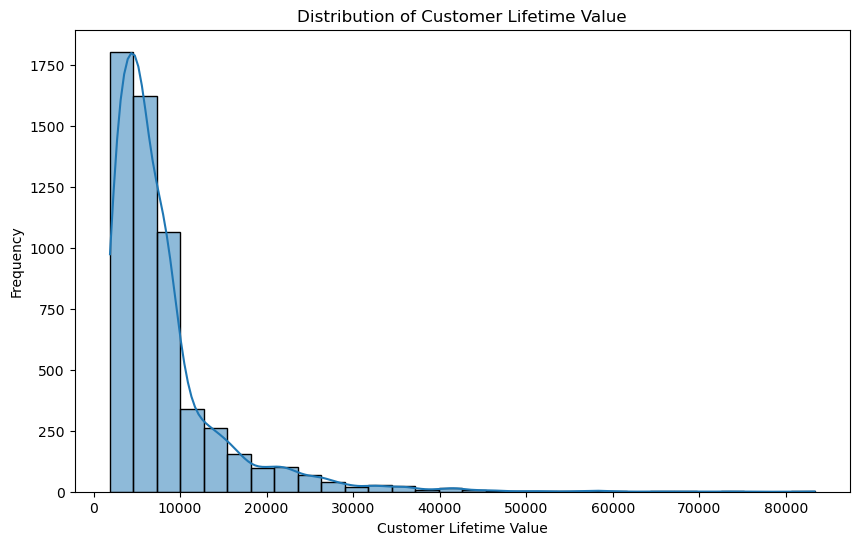

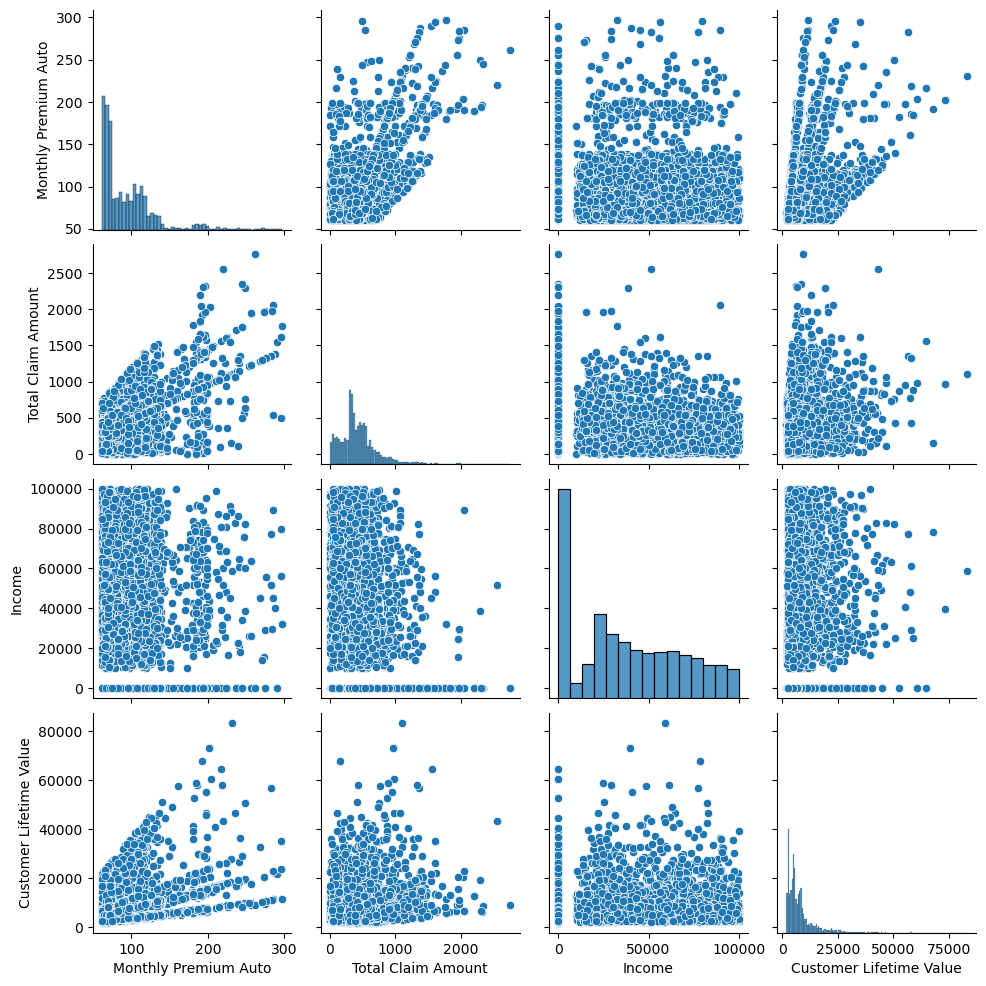

EDA completed.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df.describe())

# Visualize distribution of CLV
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Lifetime Value'], bins=30, kde=True)
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()

# Visualize relationship between features
sns.pairplot(df[['Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']])
plt.show()

print('EDA completed.')

## 4. Feature Engineering

Pada langkah ini, kita akan mengubah fitur kategorikal menjadi numerik, serta melakukan normalisasi dan pembuatan fitur baru jika diperlukan.

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Perbarui fitur kategorikal untuk mencocokkan nama kolom yang benar
numerical_features = ['Monthly Premium Auto', 'Total Claim Amount', 'Income']
categorical_features = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Education']

# Definisikan preprocessing untuk fitur numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Terapkan preprocessing
X = df.drop('Customer Lifetime Value', axis=1)
y = df['Customer Lifetime Value']

X_preprocessed = preprocessor.fit_transform(X)

print('Feature engineering completed.')


Feature engineering completed.


## 5. Pembagian Data

Pisahkan data menjadi set pelatihan dan pengujian untuk melatih model dan menguji performanya.

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print('Data split into training and test sets.')

Data split into training and test sets.


## 6. Pemilihan Model

Pilih model machine learning yang sesuai dan latih model tersebut dengan data pelatihan.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Initialize and train models
model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

print('Model training completed.')

Model training completed.


## 7. Evaluasi Model

Evaluasi performa model menggunakan data pengujian dan metrik evaluasi yang sesuai.

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict and evaluate for Linear Regression
y_pred_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Predict and evaluate for Random Forest
y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Linear Regression - MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}')
print(f'Random Forest - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}')

print('Model evaluation completed.')

Linear Regression - MAE: 3849.64, MSE: 36676494.82, R²: 0.17
Random Forest - MAE: 3705.82, MSE: 33669705.75, R²: 0.24
Model evaluation completed.


## 8. Tuning dan Optimasi

Lakukan tuning hyperparameter dan optimasi fitur untuk meningkatkan performa model.

In [15]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print('Best parameters:', grid_search.best_params_)

print('Hyperparameter tuning and feature selection completed.')

Best parameters: {'max_depth': 10, 'n_estimators': 200}
Hyperparameter tuning and feature selection completed.


## 9. Implementasi dan Interpretasi

Terapkan model pada data baru dan gunakan hasil model untuk mendapatkan wawasan bisnis yang berharga.

In [16]:
# Predict using the best model
y_pred_final = best_model.predict(X_test)

# Example of interpretation
print('Predictions for the first 5 customers:', y_pred_final[:5])

print('Model implementation and interpretation completed.')

Predictions for the first 5 customers: [11750.73780832  5850.41783335  7166.28611264  8684.89894208
  8030.84334402]
Model implementation and interpretation completed.
